In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
# Define data directory and file names
data_directory = r"C:\Users\headc\Documents\Bellevue\DSC680\Project 2\Week 5\Data\online_shoppers_intention.csv"
shopper_df = pd.read_csv(data_directory)

print(shopper_df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [25]:
# If value is missing, replace with a 0
shopper_df.fillna(0, inplace=True)

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

C:\Users\headc\AppData\Local\Temp\ipykernel_8132\1946534581.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf = shopper_df.select_dtypes(include=[np.object])
C:\Users\headc\AppData\Local\Temp\ipykernel_8132\1946534581.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = shopper_df.corr()


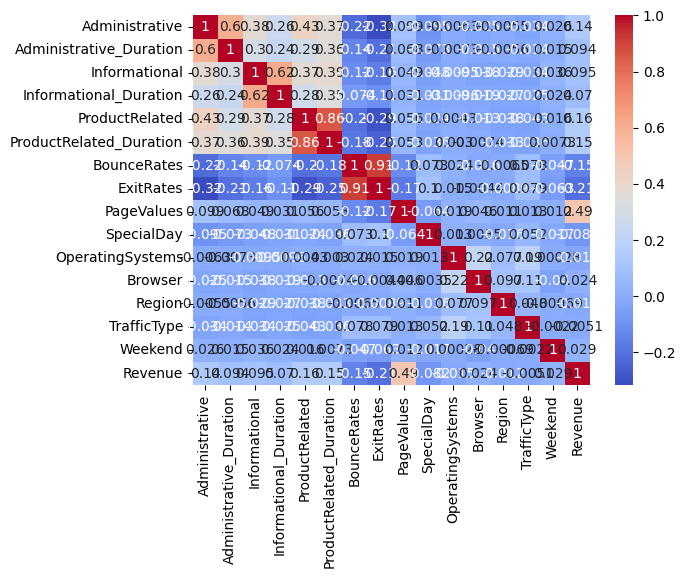

In [26]:
# Numerical feature distribution
nf = shopper_df.select_dtypes(include=[np.number])
print(nf.describe())

# Categorical feature distribution
cf = shopper_df.select_dtypes(include=[np.object])
print(cf.describe())

# Correlation Matrix and heatmap
corr_matrix = shopper_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [29]:
# Define features and target variable
X = shopper_df.drop("Revenue", axis=1)
y = shopper_df["Revenue"]

# Separate features and create transformers. 
# Found this method here: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html 
numerical_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[np.object]).columns
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# ColumnTransformer applies different preprocessing steps to each variable type
preprocess_steps = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline with the preprocessing steps and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier())])

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predict = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predict))
print("Classification Report:\n", classification_report(y_test, predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

C:\Users\headc\AppData\Local\Temp\ipykernel_8132\626503876.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X.select_dtypes(include=[np.object]).columns


Accuracy: 0.894566098945661
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.75      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Confusion Matrix:
 [[1982   73]
 [ 187  224]]


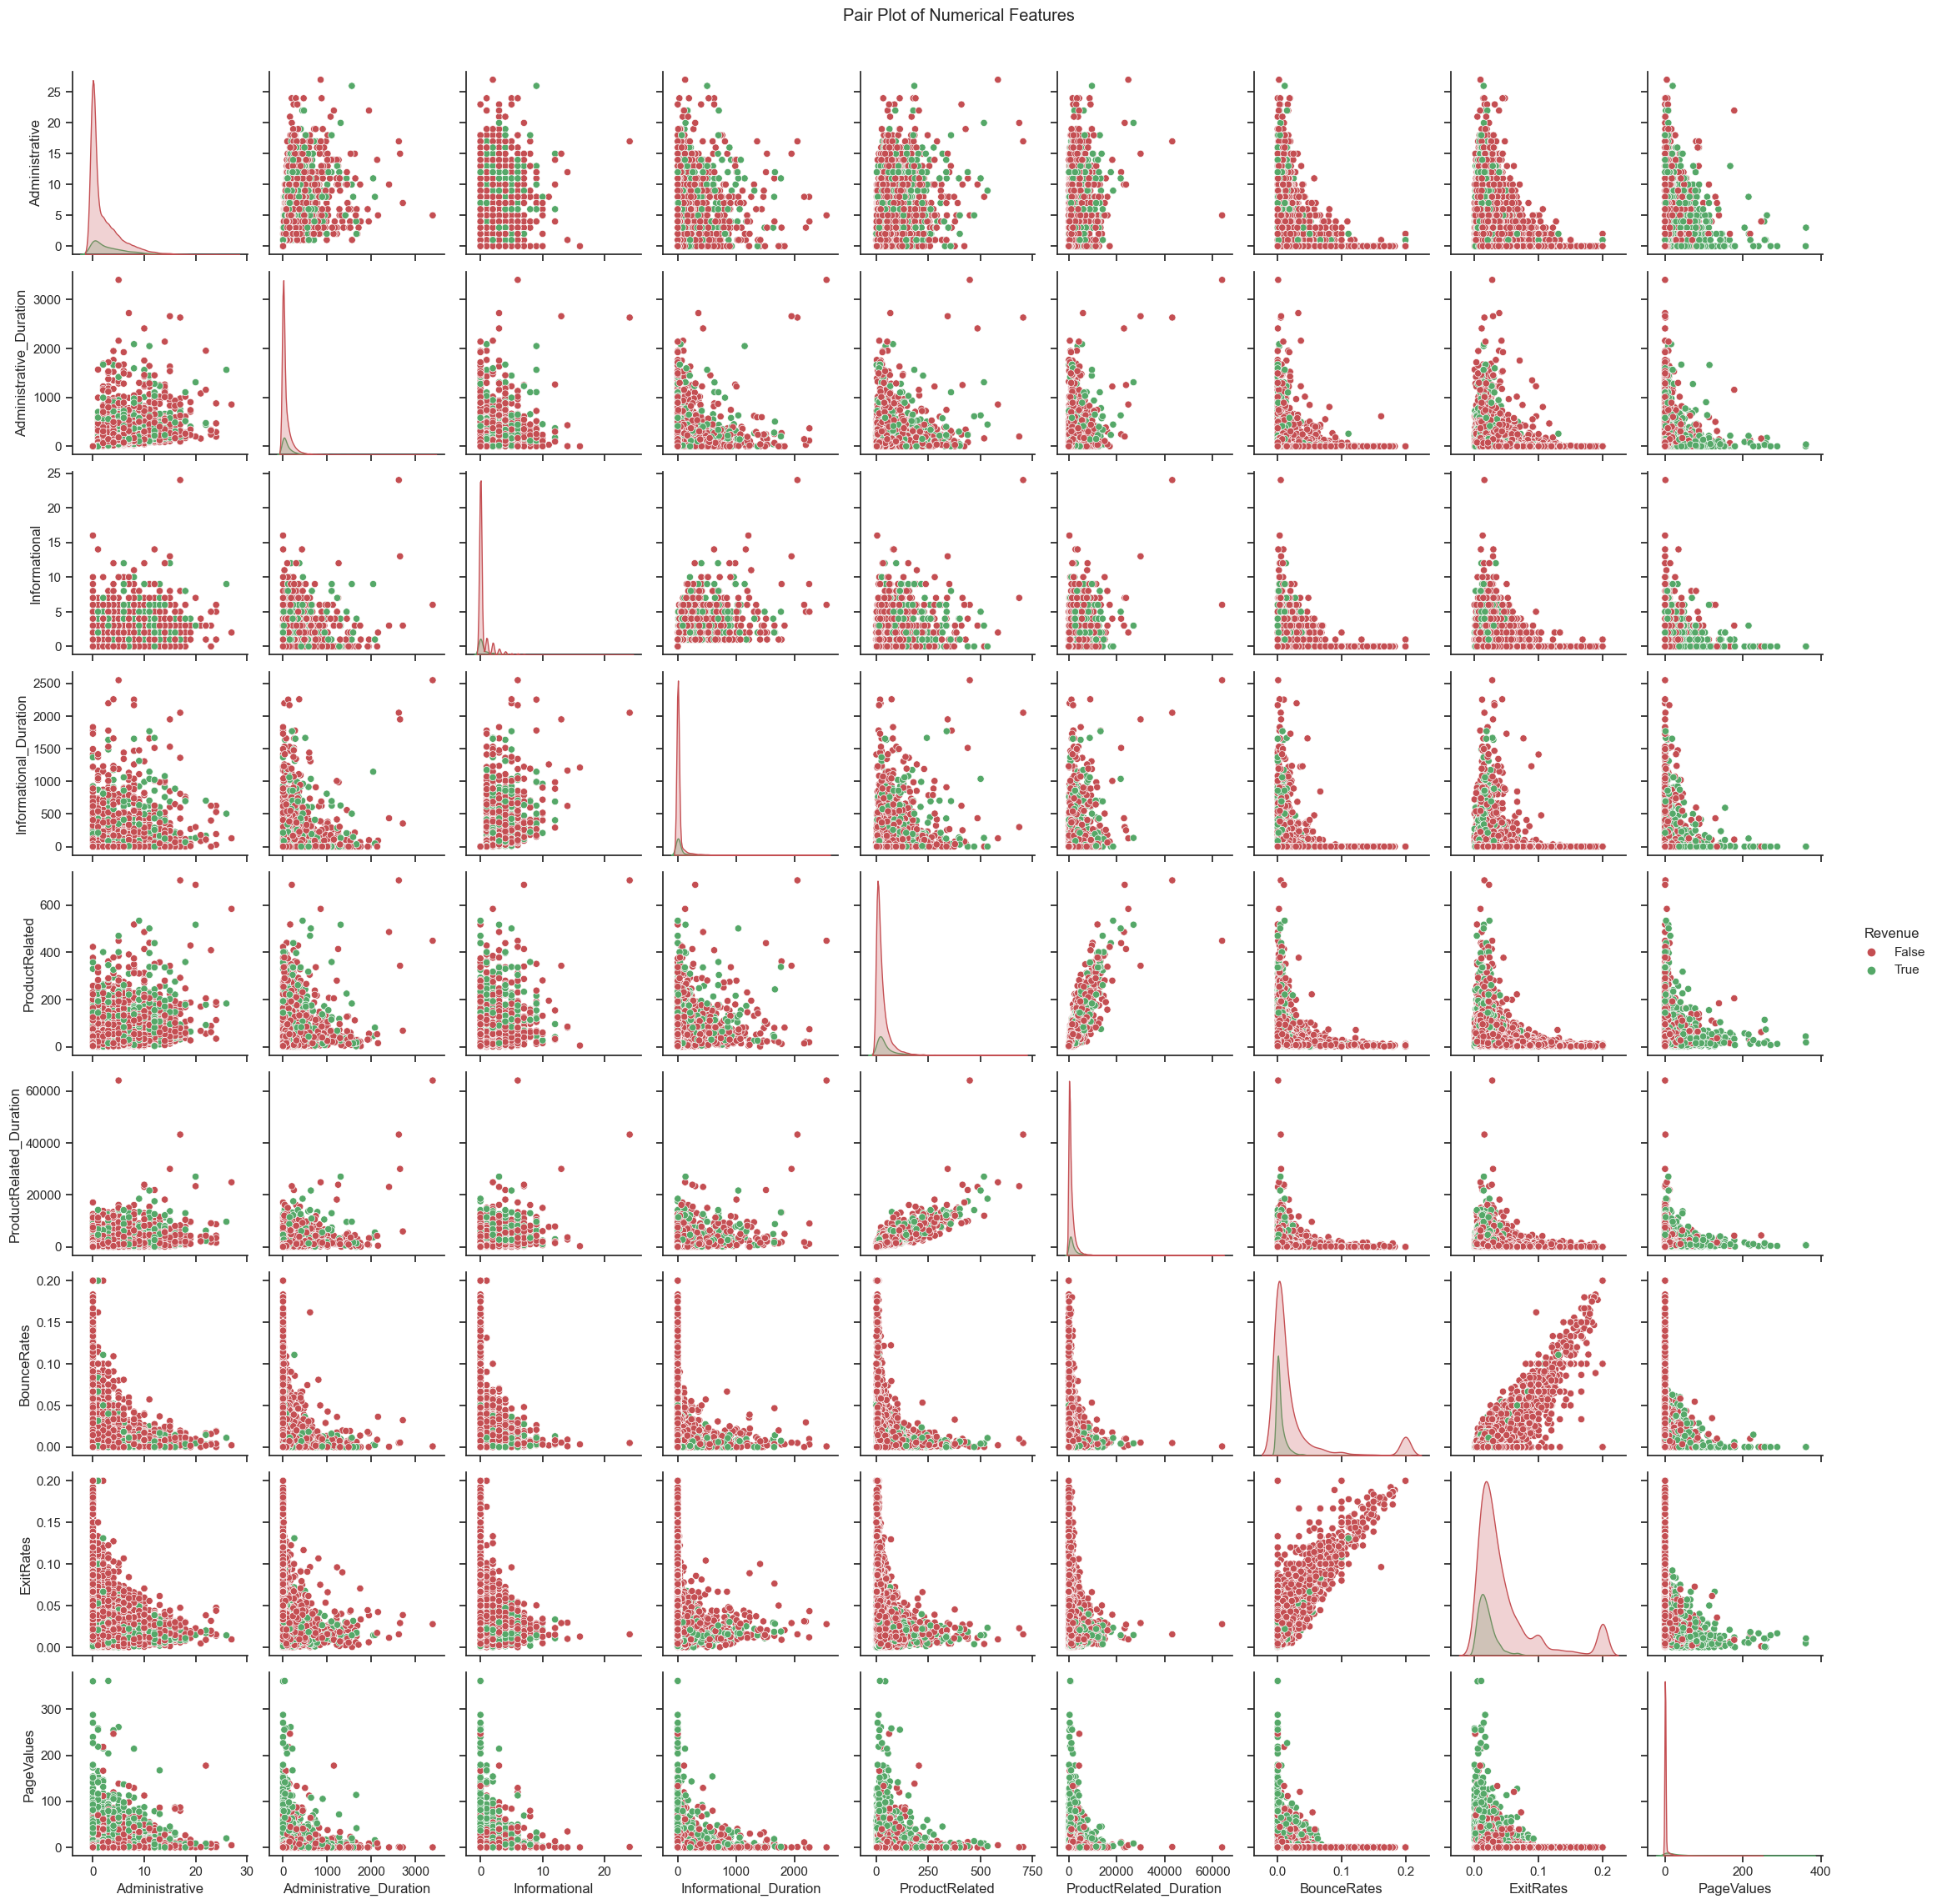

In [30]:
# Pick columns for pair plot
pairplot_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues']

# Craete the pair plot with visual selections
pairplot_data = shopper_df[pairplot_cols + ['Revenue']] # color identification
sns.set(style="ticks", color_codes=True) # style
pair_plot = sns.pairplot(pairplot_data, hue="Revenue", palette={True: 'g', False: 'r'})
pair_plot.fig.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

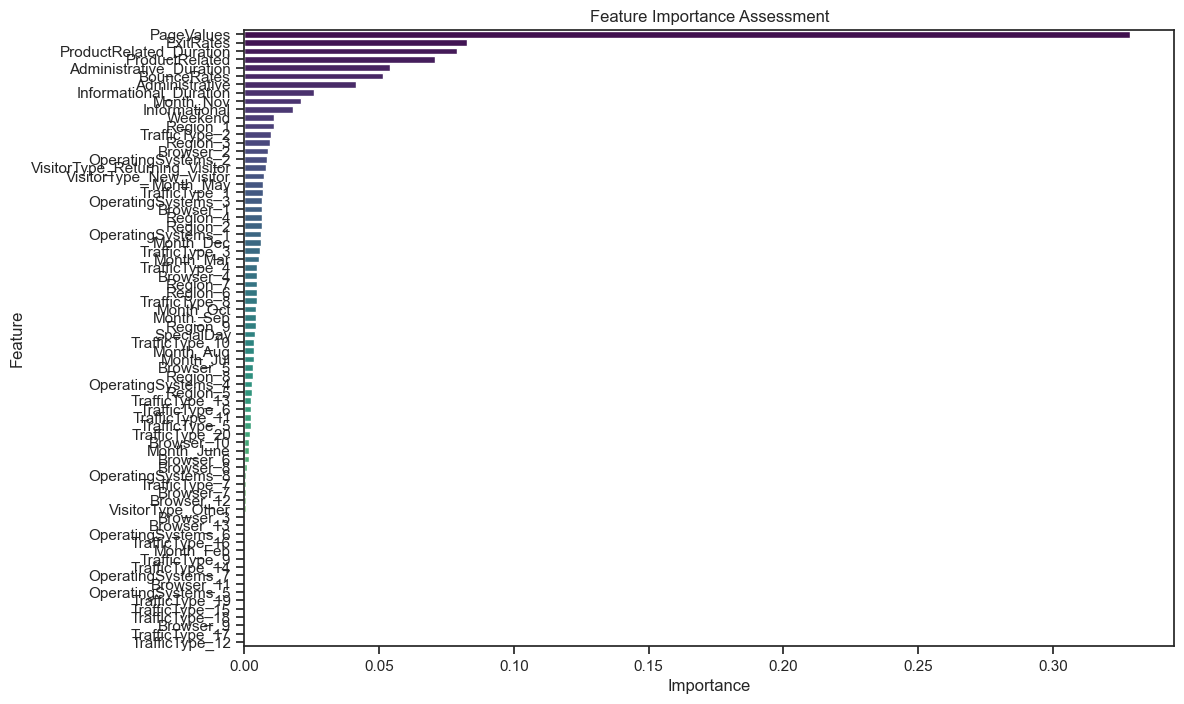

In [35]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'])

# Train the RandomForestClassifier on the entire dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Assessment')
plt.show()

In [34]:
# Troublehoot error "['OperatingSystem'] not in index"
print(X.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [36]:
# Print feature importances in descending order
print("Feature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Extract the top features
top_features = feature_importance_df['Feature'].tolist()

# Check the order of importance for the specified features
page_values_rank = top_features.index('PageValues') + 1
product_related_duration_rank = top_features.index('ProductRelated_Duration') + 1
product_related_rank = top_features.index('ProductRelated') + 1

# Print the order of importance for the specified features
print("\nOrder of Importance:")
print(f"#1 PageValues: {page_values_rank}")
print(f"#2 ProductRelated_Duration: {product_related_duration_rank}")
print(f"#3 ProductRelated: {product_related_rank}")

Feature Importances:
PageValues: 0.3286
ExitRates: 0.0826
ProductRelated_Duration: 0.0790
ProductRelated: 0.0708
Administrative_Duration: 0.0540
BounceRates: 0.0513
Administrative: 0.0416
Informational_Duration: 0.0258
Month_Nov: 0.0211
Informational: 0.0183
Weekend: 0.0112
Region_1: 0.0111
TrafficType_2: 0.0099
Region_3: 0.0096
Browser_2: 0.0088
OperatingSystems_2: 0.0083
VisitorType_Returning_Visitor: 0.0081
VisitorType_New_Visitor: 0.0074
Month_May: 0.0071
TrafficType_1: 0.0069
OperatingSystems_3: 0.0068
Browser_1: 0.0066
Region_4: 0.0065
Region_2: 0.0064
OperatingSystems_1: 0.0063
Month_Dec: 0.0061
TrafficType_3: 0.0057
Month_Mar: 0.0055
TrafficType_4: 0.0049
Browser_4: 0.0049
Region_7: 0.0049
Region_6: 0.0048
TrafficType_8: 0.0047
Month_Oct: 0.0044
Month_Sep: 0.0043
Region_9: 0.0042
SpecialDay: 0.0039
TrafficType_10: 0.0038
Month_Aug: 0.0037
Month_Jul: 0.0037
Browser_5: 0.0033
Region_8: 0.0031
OperatingSystems_4: 0.0030
Region_5: 0.0028
TrafficType_13: 0.0027
TrafficType_6: 0.0026